In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. IMPORTING NECESSARY LIBRARIES & PACKAGES**

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

**2. READING AND EXPLORING DATA**

In [45]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/HR Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [50]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**3. DATA PREPROCESSING**

In [52]:
#1 Assuming 'df' is our DataFrame
unique_value_columns = [col for col in df.columns if df[col].nunique() == 1]
unique_value_columns

['EmployeeCount', 'Over18', 'StandardHours']

In [53]:
#2. Dropping Columns
df = df.drop(columns=unique_value_columns, axis=1)
df = df.drop(columns=["EmployeeNumber"], axis=1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [54]:
#3 Define array for numeric and categorical vars
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numeric_columns, categorical_columns

(Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'OverTime'],
       dtype='object'))

In [55]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [56]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

**4.EXPLORATORY DATA ANALYSIS**

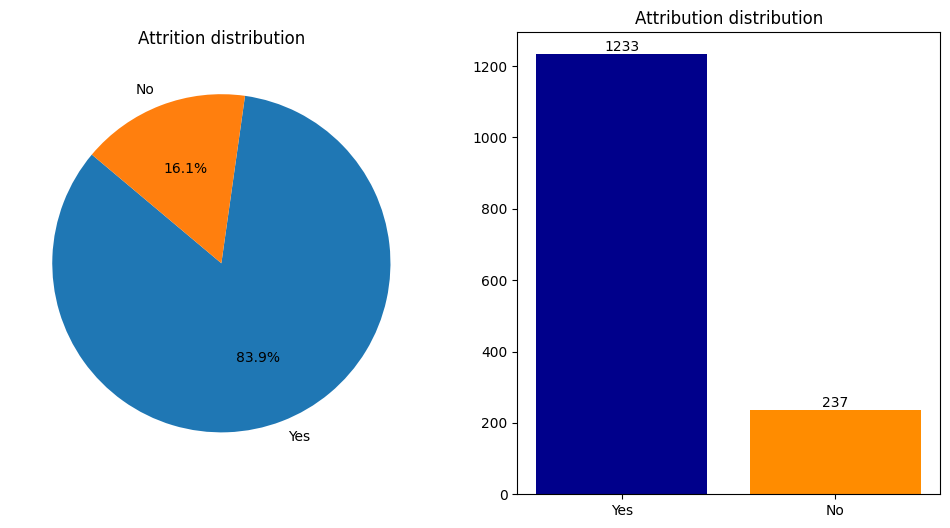

In [57]:
#1. Target Variable
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].pie(df.Attrition.value_counts(), labels=df.Attrition.unique(), autopct='%1.1f%%', startangle=140)
ax[0].set_title("Attrition distribution")
ax[1].bar(df.Attrition.unique(), df.Attrition.value_counts(), color=["darkblue", "darkorange"])
for bars in ax[1].containers:
    ax[1].bar_label(bars)
plt.title("Attribution distribution")
plt.show()

Text(0.5, 1.0, 'Age Distribution in Percent by Attrition Status')

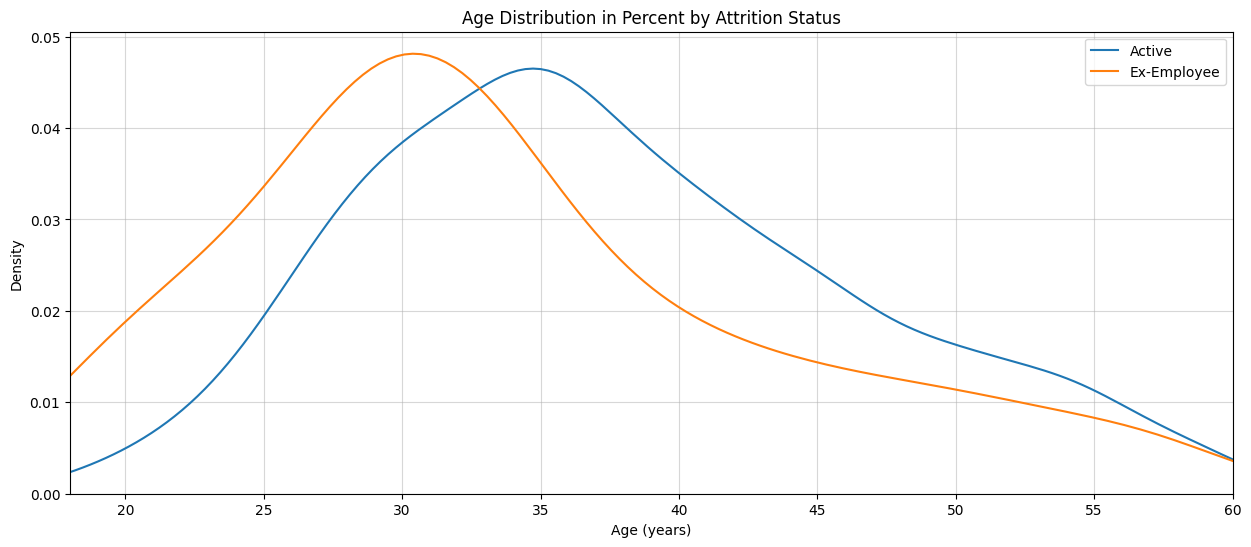

In [58]:
#2. Social Circumstances Analysis
plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'Age'], label = 'Active')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employee')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by Attrition Status')

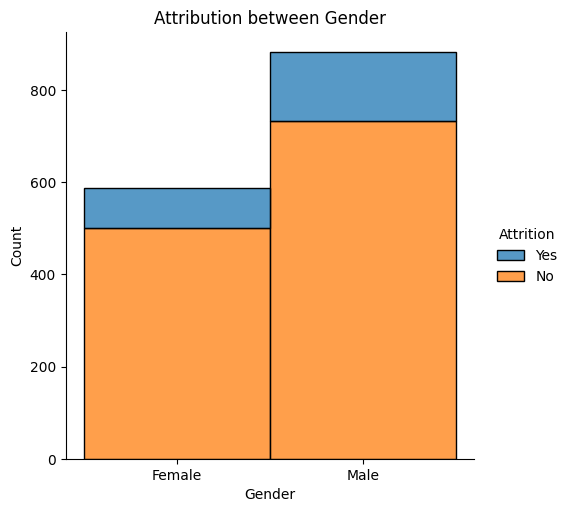

In [63]:
#3. Gender
sns.displot(data=df, x="Gender", hue="Attrition", multiple="stack").set(title="Attribution between Gender")

In [64]:
#3.1
value_counts_with_percentage = df[['Gender','Attrition']].groupby('Gender').value_counts().groupby(level=0).apply(lambda x: x / x.sum() * 100)
value_counts_with_percentage

Gender  Gender  Attrition
Female  Female  No           85.204082
                Yes          14.795918
Male    Male    No           82.993197
                Yes          17.006803
Name: count, dtype: float64

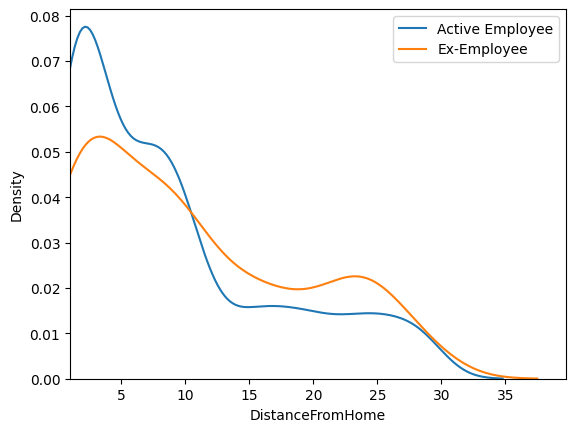

In [69]:
#3.2 Distance from Home
fig, ax = plt.subplots()
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employee')
ax.set_xlim(1)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Distribution of companies worked for')

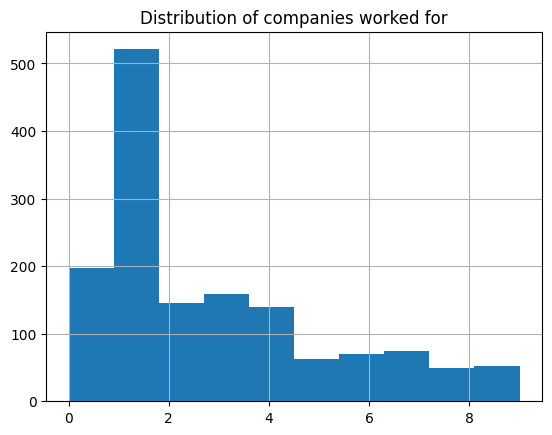

In [70]:
#3.3. Distribution of Companies worked for
df.NumCompaniesWorked.hist()
plt.title("Distribution of companies worked for")

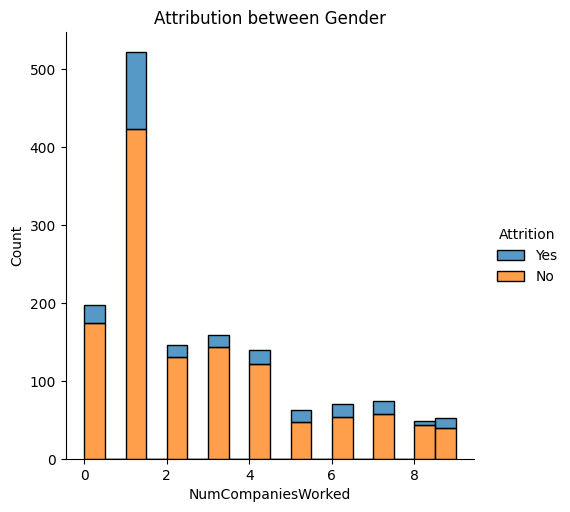

In [71]:
#3.4
sns.displot(data=df, x="NumCompaniesWorked", hue="Attrition", multiple="stack").set(title="Attribution between Gender")

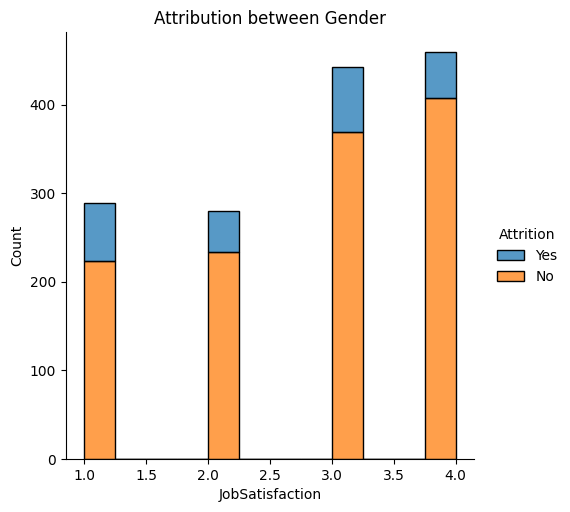

In [72]:
#3.5
sns.displot(data=df, x="JobSatisfaction", hue="Attrition", multiple="stack").set(title="Attribution between Gender")

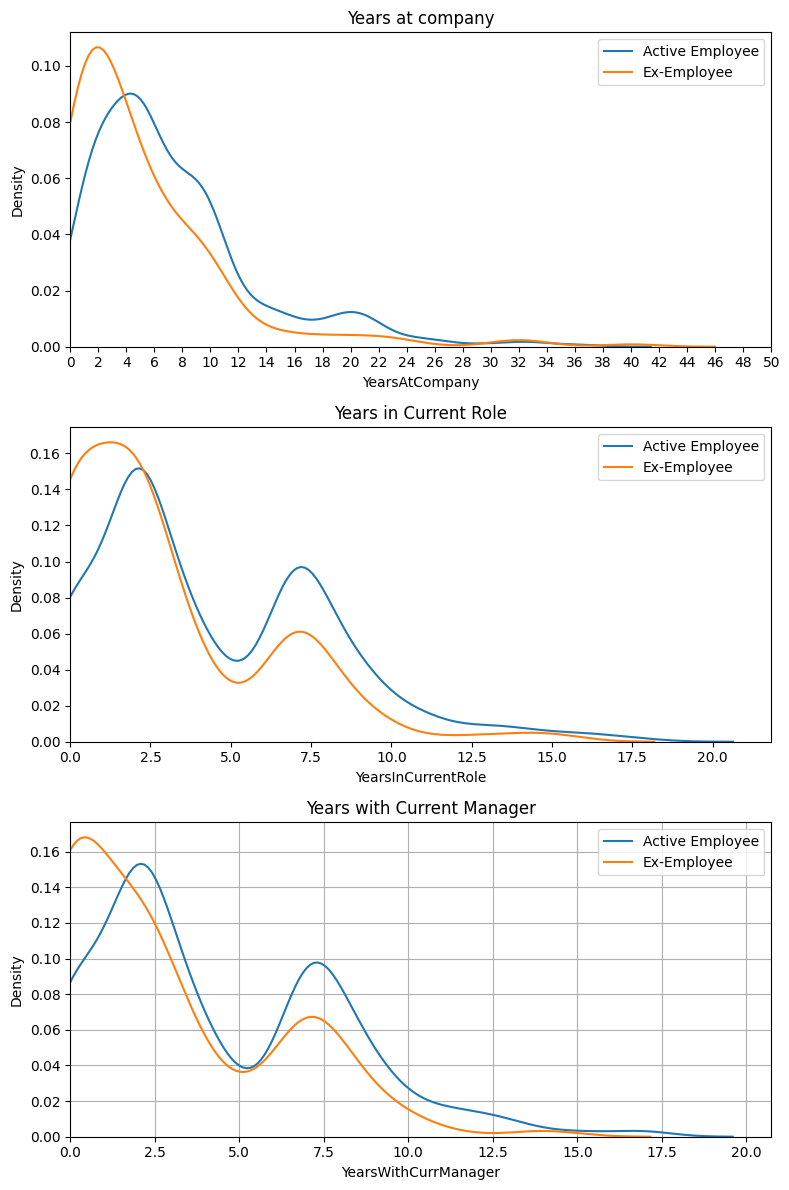

In [74]:
#4. Work Environment
#A. Creating a 2x1 subplot
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee', ax=axs[0])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employee', ax=axs[0])
axs[0].set_xlim(0)
axs[0].set_title('Years at company')
axs[0].set_xticks(range(0, 52, 2))
axs[0].legend()

#B. Plotting 'YearsInCurrentRole' in the first subplot
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsInCurrentRole'], label='Active Employee', ax=axs[1])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsInCurrentRole'], label='Ex-Employee', ax=axs[1])
axs[1].set_xlim(0)
axs[1].set_title('Years in Current Role')
axs[1].legend()

#C. Plotting 'YearsWithCurrManager' in the second subplot
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsWithCurrManager'], label='Active Employee', ax=axs[2])
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsWithCurrManager'], label='Ex-Employee', ax=axs[2])
axs[2].set_xlim(0)
axs[2].set_title('Years with Current Manager')
axs[2].legend()

#D. Adjusting layout for better readability
plt.tight_layout()
plt.grid()

#E. Display the plot
plt.show()

In [75]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

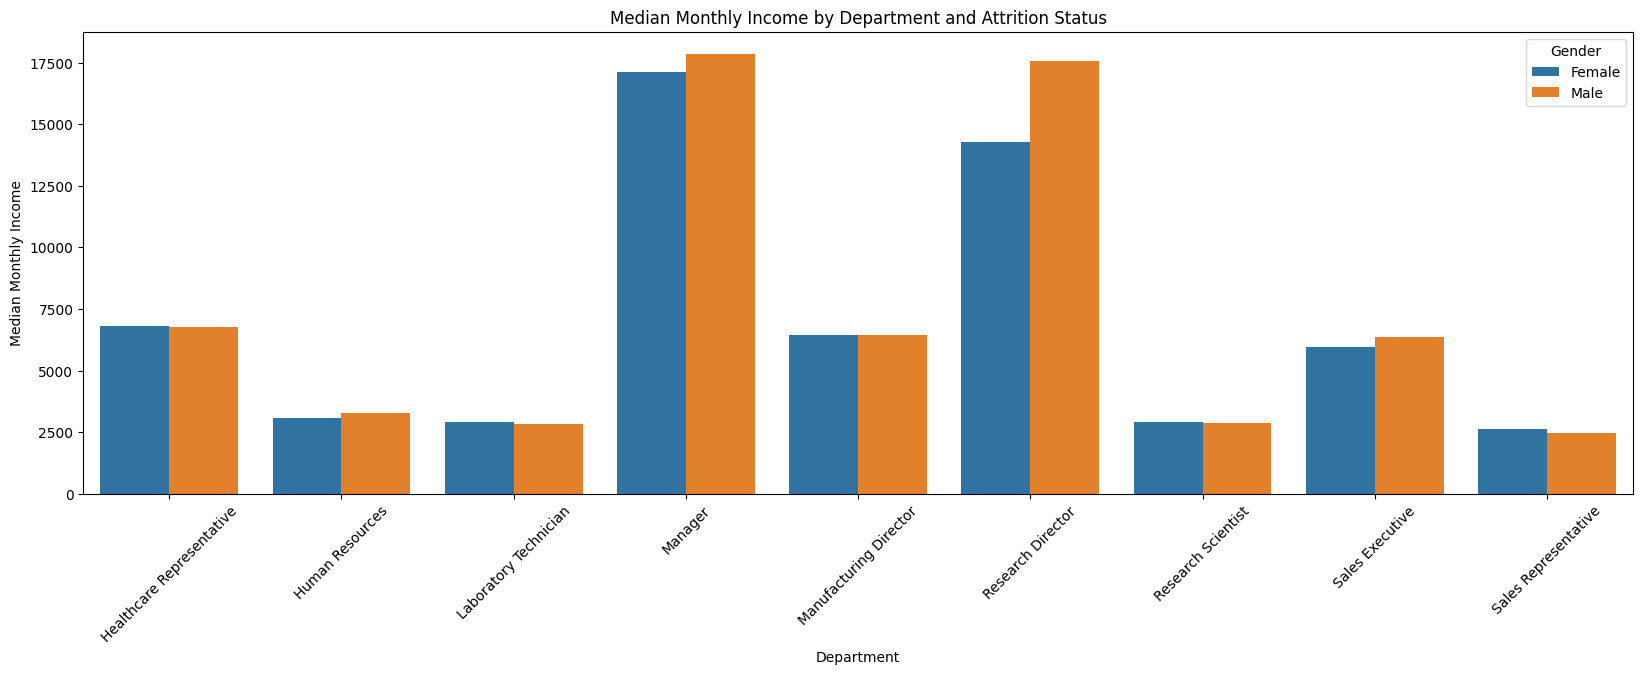

In [76]:
#4.1 Median Monthly Income by Department and Attrition Status
#A. Assuming 'df' is your original DataFrame
plot_df = df.groupby(['JobRole', 'Gender'])['MonthlyIncome'].median().reset_index()

#B. Creating the bar plot
plt.figure(figsize=(20,6))
sns.barplot(data=plot_df, x='JobRole', y='MonthlyIncome', hue='Gender')

plt.title('Median Monthly Income by Department and Attrition Status')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylabel('Median Monthly Income')
plt.show()

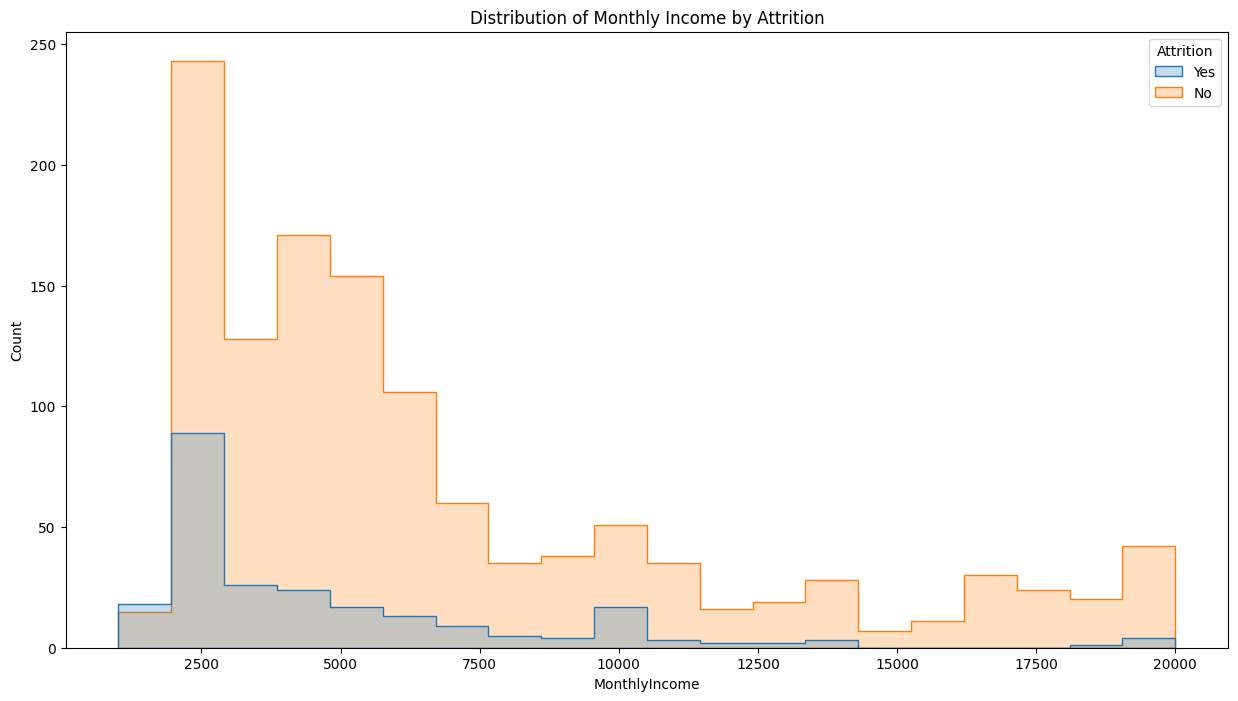

In [77]:
#4.2 Distribution of Monthly Income by Attrition
plt.figure(figsize=(15,8))
sns.histplot(df, x="MonthlyIncome", hue="Attrition", element="step")
plt.title('Distribution of Monthly Income by Attrition')
plt.show()

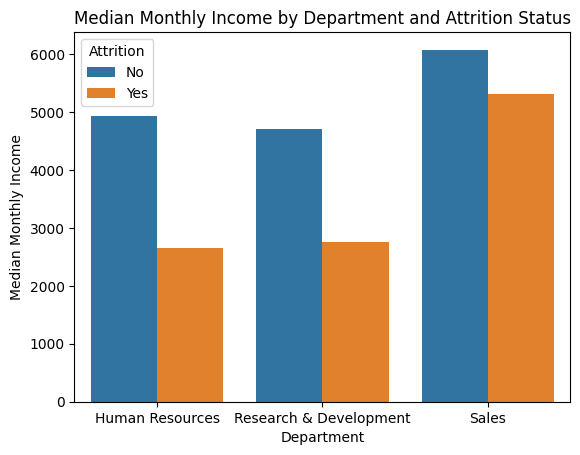

In [78]:
#4.3 Median Monthly Income by Department and Attrition Status
#A. Assuming 'df' is your original DataFrame
plot_df = df.groupby(['Department', 'Attrition'])['MonthlyIncome'].median().reset_index()

#B. Creating the bar plot
sns.barplot(data=plot_df, x='Department', y='MonthlyIncome', hue='Attrition')

plt.title('Median Monthly Income by Department and Attrition Status')
plt.xlabel('Department')
plt.ylabel('Median Monthly Income')
plt.show()

<Axes: >

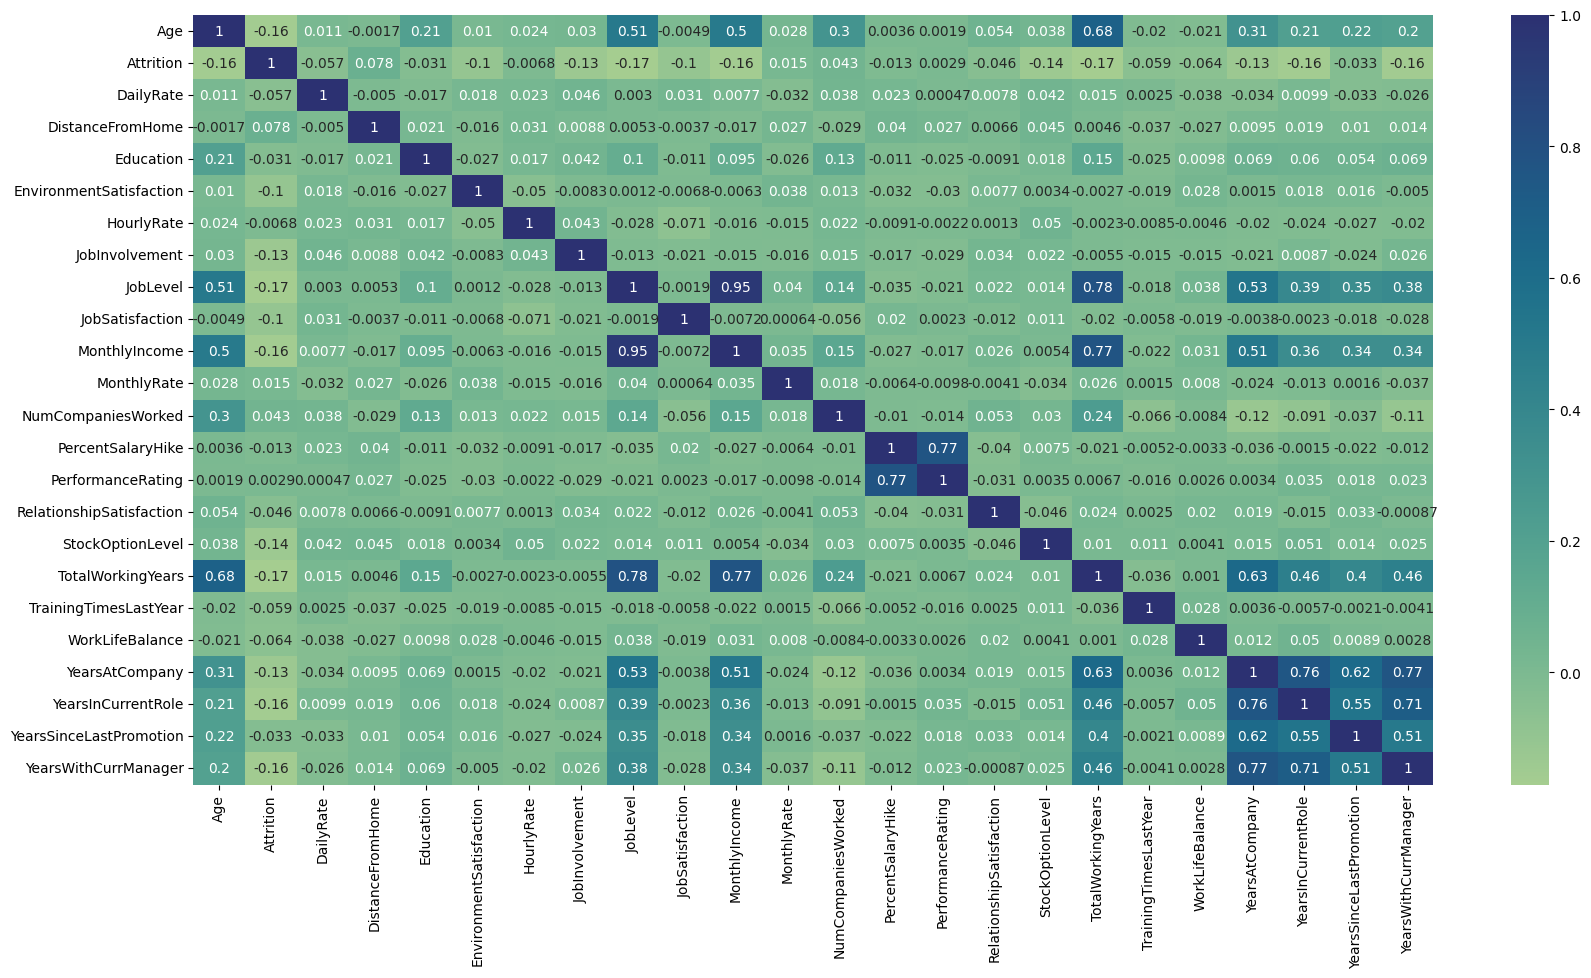

In [84]:
#5. Correlation Matrix / Showing Corelation map
df_trans = df.copy()
df_trans['Attrition'] = df_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
corr_matrix = df_trans.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, cmap="crest", annot=True,)